In [1]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.sql import SparkSession

sc = SparkContext()

spark = SparkSession.builder \
     .appName("Test SparkSession") \
     .getOrCreate()

In [2]:
#Reading in the data as a dataframe
citibike = spark.read.load("s3://502mashagubenko/502Project/FullCitibike")
capital = spark.read.load("s3://502mashagubenko/502Project/Capital")

In [3]:
# Number of stations for citibike
citibike.select("start_station_id").distinct().count()
citibike.select("end_station_id").distinct().count()

1135

In [8]:
# Number of stations for capital
capital.select("start_station_number").distinct().count()
capital.select("end_station_number").distinct().count()

581

In [3]:
citibike.printSchema()

root
 |-- tripduration: integer (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- start_station_id: integer (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_latitude: string (nullable = true)
 |-- start_station_longitude: string (nullable = true)
 |-- end_station_id: integer (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_latitude: string (nullable = true)
 |-- end_station_longitude: string (nullable = true)
 |-- bikeid: integer (nullable = true)
 |-- usertype: string (nullable = true)
 |-- birth_year: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- start_time: timestamp (nullable = true)
 |-- stop_time: timestamp (nullable = true)
 |-- dist: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- member: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)



In [8]:
capital.printSchema()

root
 |-- Duration: integer (nullable = true)
 |-- start_date: string (nullable = true)
 |-- end_date: string (nullable = true)
 |-- start_station_number: string (nullable = true)
 |-- start_station: string (nullable = true)
 |-- end_station_number: string (nullable = true)
 |-- end_station: string (nullable = true)
 |-- bike_number: string (nullable = true)
 |-- member_type: string (nullable = true)
 |-- start_lat: string (nullable = true)
 |-- start_long: string (nullable = true)
 |-- end_lat: string (nullable = true)
 |-- end_long: string (nullable = true)
 |-- dist: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- start_time: timestamp (nullable = true)
 |-- stop_time: timestamp (nullable = true)
 |-- day_of_week: integer (nullable = true)



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# CITIBIKE ANALYSIS

In [5]:
#average of trip duration.
citibike = citibike.dropna(subset=['usertype'])
usert = pd.DataFrame()
usert = pd.DataFrame()
usert['averageduration'] = (citibike.groupby(['usertype', 'tripduration']).mean())
usert = usert.reset_index()


In [5]:
citibike.select("usertype").summary().show()

+-------+----------+
|summary|  usertype|
+-------+----------+
|  count| 147666495|
|   mean|      null|
| stddev|      null|
|    min|  Customer|
|    25%|      null|
|    50%|      null|
|    75%|      null|
|    max|Subscriber|
+-------+----------+



In [14]:
citibike.select(['usertype', 'tripduration']).summary("mean")

DataFrame[summary: string, usertype: string, tripduration: string]

In [12]:
citibike.select("gender").summary().show()

+-------+------------------+
|summary|            gender|
+-------+------------------+
|  count|         147666495|
|   mean|1.1152346712096064|
| stddev|0.5588447342047681|
|    min|                 0|
|    25%|                 1|
|    50%|                 1|
|    75%|                 1|
|    max|                 2|
+-------+------------------+



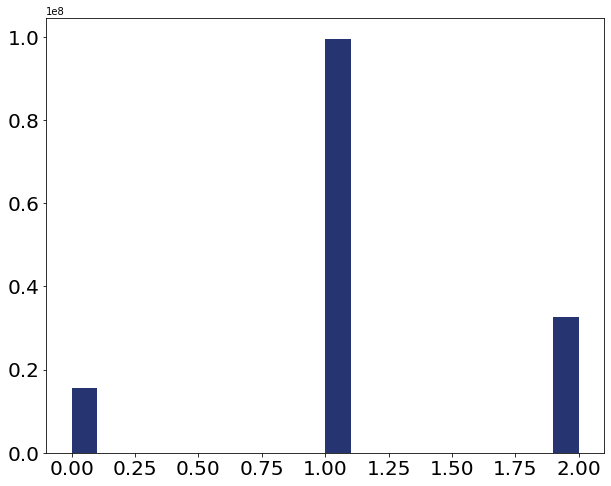

In [14]:
#Histogram of gender column
fig = plt.figure(figsize=(10, 8))
bins, counts = citibike.select('gender').rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts, color = '#263572')
plt.xticks(size = 20)
plt.yticks(size = 20)
fig.savefig("citibike_gender.png", bbox_inches='tight')

In [15]:
citibike.groupBy('gender').count().show()

+------+--------+
|gender|   count|
+------+--------+
|     1|99588283|
|     2|32547256|
|     0|15530956|
+------+--------+



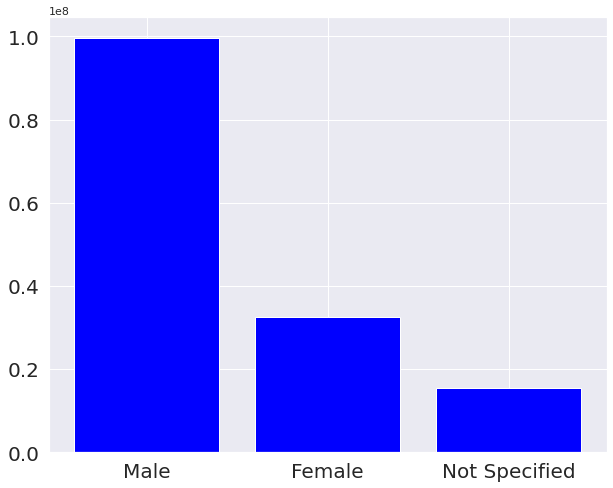

In [41]:
fig = plt.figure(figsize=(10, 8))
index = ['Male', 'Female', 'Not Specified']
mean = [99588283,32547256, 15530956]
plt.bar(index,mean, color = 'blue')
plt.yticks(size = 20)
plt.xticks(index, size = 20)
plt.show()
fig.savefig("genderoverview.png", bbox_inches='tight')

1: Males have the highest number of rides followed by 2: Females. The rest aren't documented.

In [10]:
citibike.select("age").summary('mean').show()

+-------+-----------------+
|summary|              age|
+-------+-----------------+
|   mean|41.83112246499384|
+-------+-----------------+



In [37]:
citibike = citibike.dropna()
citibikegender = citibike.groupby('gender')
citibikegender

In [38]:
avg_colsg = ['minutes', 'age']
citibikegender.avg(*avg_colsg).show()

+------+------------------+-----------------+
|gender|      avg(minutes)|         avg(age)|
+------+------------------+-----------------+
|     1|13.716180614499313|41.37831377825107|
|     2| 16.33430558502109|39.95615568862841|
|     0| 34.81372622283357|49.67819591213413|
+------+------------------+-----------------+



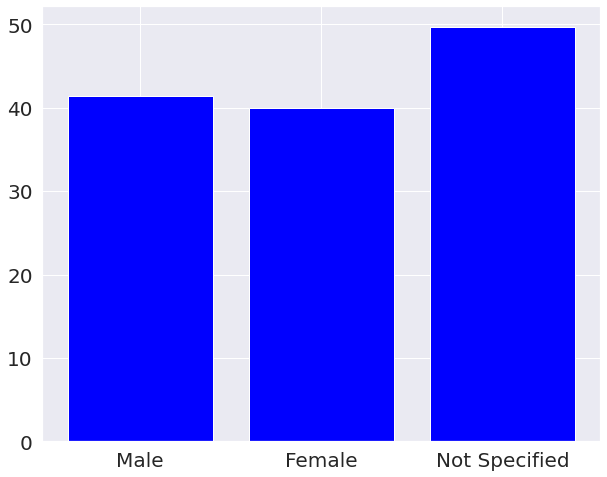

In [39]:
fig = plt.figure(figsize=(10, 8))
index = ['Male', 'Female', 'Not Specified']
counts = [41.378,39.956,49.678]
plt.bar(index,counts, color = 'blue')
plt.yticks(size = 20)
plt.xticks(index, size = 20)
plt.show()
fig.savefig("GenderandAge.png", bbox_inches='tight')

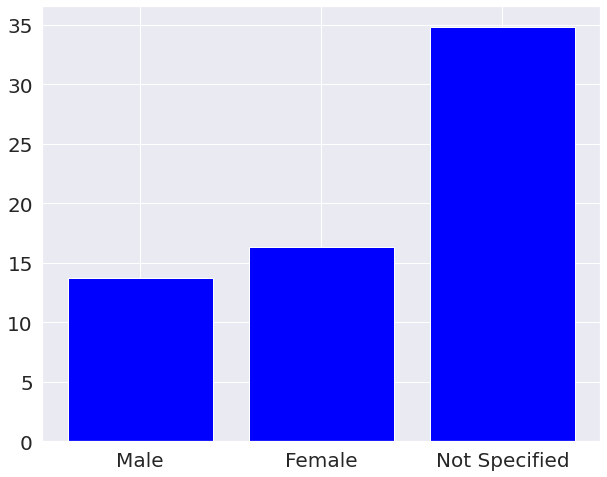

In [40]:
fig = plt.figure(figsize=(10, 8))
index = ['Male', 'Female', 'Not Specified']
counts = [13.716,16.334,34.813]
plt.bar(index,counts, color = 'blue')
plt.yticks(size = 20)
plt.xticks(index, size = 20)
plt.show()
fig.savefig("GenderandMinutes.png", bbox_inches='tight')

Mean age of a bike rider is ~ 41/42

# Trip Distribution Analysis

**Converting into minutes**

In [8]:
citibike=citibike.withColumn("minutes", citibike.tripduration/60)
'minutes'in list(citibike.columns)

True

In [13]:
citibikemins=citibike.select("minutes").summary('mean').show()

+-------+------------------+
|summary|           minutes|
+-------+------------------+
|   mean|16.071086347698856|
+-------+------------------+



On average, the bike ride trip duration in minutes is ~ 16.

In [5]:
citibike = citibike.dropna()
citibike.groupBy('usertype').count().show()

+----------+--------+
|  usertype|   count|
+----------+--------+
|Subscriber|90830536|
|  Customer| 6293948|
+----------+--------+



Most rides were initiated by Subscribers, not Customers.

citibikemin = citibike.subset=['usertype', 'minutes']
usert = pd.DataFrame()
citibikemin.printSchema()

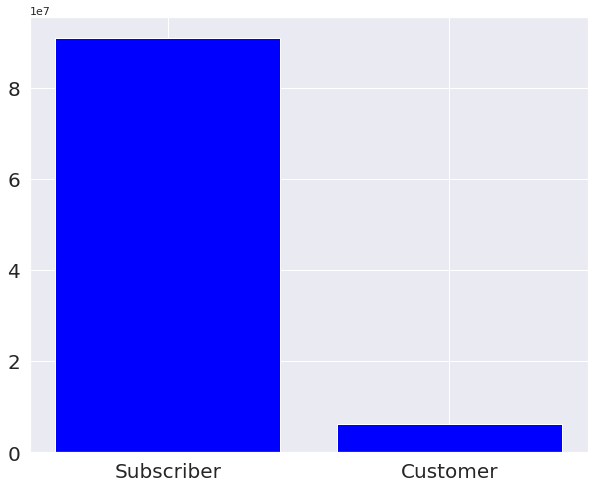

In [42]:
fig = plt.figure(figsize=(10, 8))
index = ['Subscriber', 'Customer']
counts = [90830536,6293948]
plt.bar(index,counts, color = 'blue')
plt.yticks(size = 20)
plt.xticks(index, size = 20)
plt.show()
fig.savefig("UsertypeOverview.png", bbox_inches='tight')

In [ ]:
#Histogram of age column
fig = plt.figure(figsize=(10, 8))
bins, counts = citibike.select('age', 'member').rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts, color = '#263572')
plt.xticks(size = 20)
plt.yticks(size = 20)
fig.savefig("TEST.png", bbox_inches='tight')

import sys
sys.setrecursionlimit(100000)

**RF TO PREDICT GENDER**

In [9]:
from pyspark.ml.feature import VectorAssembler
citibike = citibike.dropna()
#Setting up the features (only numerical) 
cols=['day_of_week', 'start_station_id', 'tripduration', 'age', "end_station_id", 'member']

#Using vectorassembler to combine the feature together
assembler = VectorAssembler(inputCols=cols,outputCol='features')

In [10]:
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(labelCol="gender", featuresCol="features")

In [11]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler

#pipeline = Pipeline(stages=[assembler, rf])

vectorized = assembler.transform(citibike)
vectorized.select("features").show(truncate=False)
#vectorized=standardscaler.fit(vectorized).transform(vectorized) #standardized

train, test = vectorized.randomSplit([0.8, 0.2])

+-----------------------------------+
|features                           |
+-----------------------------------+
|[6.0,284.0,482.0,36.0,491.0,1.0]   |
|[6.0,393.0,3184.0,79.0,393.0,1.0]  |
|[6.0,3178.0,1647.0,46.0,327.0,1.0] |
|[6.0,492.0,627.0,45.0,335.0,1.0]   |
|[6.0,478.0,733.0,42.0,472.0,1.0]   |
|[6.0,3140.0,367.0,50.0,3747.0,1.0] |
|[6.0,146.0,174.0,42.0,3664.0,1.0]  |
|[6.0,3697.0,1265.0,38.0,494.0,1.0] |
|[6.0,389.0,318.0,47.0,3092.0,1.0]  |
|[6.0,327.0,355.0,39.0,3664.0,1.0]  |
|[6.0,3619.0,147.0,31.0,3721.0,1.0] |
|[6.0,3749.0,523.0,29.0,3712.0,1.0] |
|[6.0,462.0,117.0,32.0,453.0,1.0]   |
|[6.0,394.0,503.0,34.0,3788.0,1.0]  |
|[6.0,3524.0,973.0,44.0,3126.0,1.0] |
|[6.0,3686.0,774.0,35.0,426.0,1.0]  |
|[6.0,151.0,686.0,46.0,3641.0,1.0]  |
|[6.0,504.0,185.0,29.0,174.0,1.0]   |
|[6.0,3159.0,641.0,39.0,359.0,1.0]  |
|[6.0,3592.0,1086.0,56.0,3608.0,1.0]|
+-----------------------------------+
only showing top 20 rows



In [ ]:
model=rf.fit(train)
train=model.transform(train)
test=model.transform(test)

In [ ]:
print("COUNT FOR TRAIN: " + str(train.count()))
print("COUNT OF TEST: " + str(test.count()))

In [74]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="gender", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predict_test)
rmse

0.4405528962340486

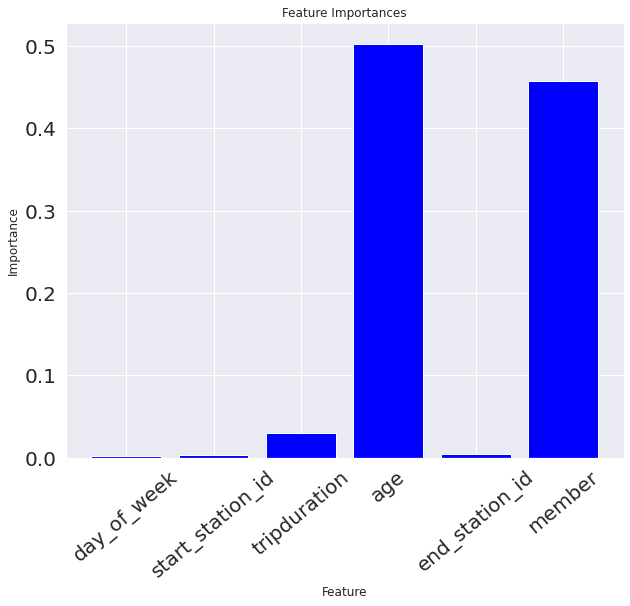

In [75]:
importances = model.featureImportances

x_values = list(range(len(importances)))

fig = plt.figure(figsize=(10, 8))
plt.bar(x_values, importances, orientation = 'vertical',color = 'blue')
plt.xticks(x_values, cols, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')
plt.xticks(size = 20)
plt.yticks(size = 20)
fig.savefig("GenderRandomForest.png", bbox_inches='tight')

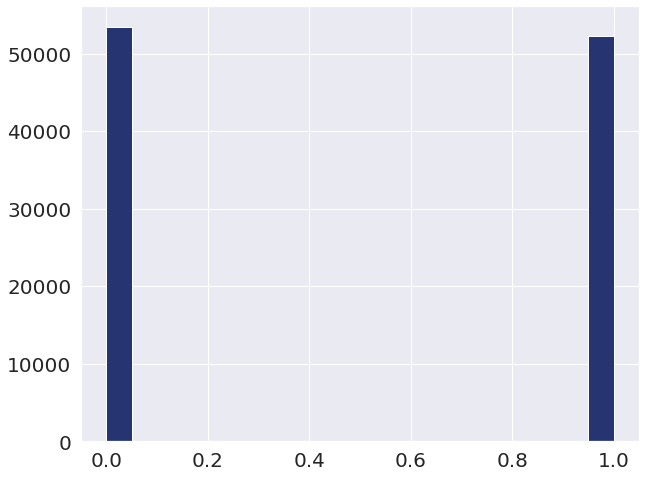

In [5]:
fig = plt.figure(figsize=(10, 8))
bins, counts = usert.select('member').rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts, color = '#263572')
plt.xticks(size = 20)
plt.yticks(size = 20)
fig.savefig("NotNeeded.png", bbox_inches='tight')

In [17]:
citibiketest1 = citibike.groupby('usertype')
citibiketest1

In [18]:
avg_cols = ['minutes', 'tripduration']
citibiketest1.avg(*avg_cols).show()

+----------+------------------+------------------+
|  usertype|      avg(minutes)| avg(tripduration)|
+----------+------------------+------------------+
|Subscriber| 13.38914606596912| 803.3487639581483|
|      null|26.739389931095296|1604.3633958657178|
|  Customer| 36.18749496708967|2171.2496980253827|
+----------+------------------+------------------+



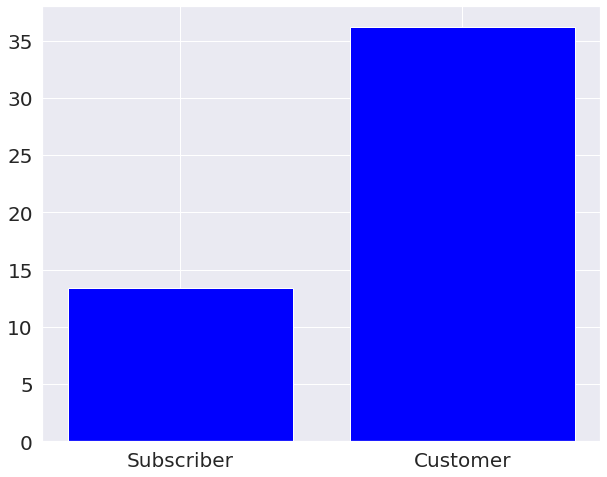

In [20]:
fig = plt.figure(figsize=(10, 8))
index = ['Subscriber', 'Customer']
counts = [13.38,36.19]
plt.bar(index,counts, color = 'blue')
plt.yticks(size = 20)
plt.xticks(index, size = 20)
plt.show()
fig.savefig("UsertypeAverageMinutes.png", bbox_inches='tight')

In [19]:
avg_cols2 = ['age']
citibiketest1.avg(*avg_cols2).show()

+----------+-----------------+
|  usertype|         avg(age)|
+----------+-----------------+
|Subscriber|41.82806329978326|
|      null|38.08400386847195|
|  Customer|41.89352145395561|
+----------+-----------------+



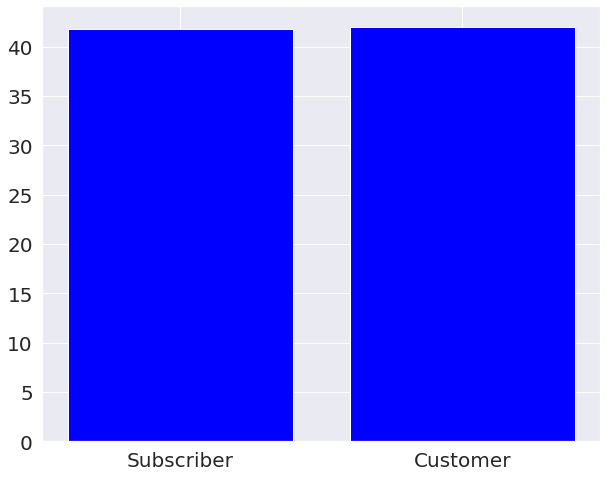

In [23]:
fig = plt.figure(figsize=(10, 8))
index = ['Subscriber', 'Customer']
counts = [41.828,42]
plt.bar(index,counts, color = 'blue')
plt.yticks(size = 20)
plt.xticks(index, size = 20)
plt.show()
fig.savefig("UsertypeandAge.png", bbox_inches='tight')

**CAPITAL ANALYSIS**

In [11]:
capital.printSchema()

root
 |-- Duration: integer (nullable = true)
 |-- start_date: string (nullable = true)
 |-- end_date: string (nullable = true)
 |-- start_station_number: string (nullable = true)
 |-- start_station: string (nullable = true)
 |-- end_station_number: string (nullable = true)
 |-- end_station: string (nullable = true)
 |-- bike_number: string (nullable = true)
 |-- member_type: string (nullable = true)
 |-- start_lat: string (nullable = true)
 |-- start_long: string (nullable = true)
 |-- end_lat: string (nullable = true)
 |-- end_long: string (nullable = true)
 |-- dist: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- start_time: timestamp (nullable = true)
 |-- stop_time: timestamp (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- minutes: double (nullable = true)



In [25]:
capital = capital.dropna()
capital.groupBy('member_type').count().show()

+-----------+--------+
|member_type|   count|
+-----------+--------+
|    Unknown|      54|
|     Member|20292497|
|     Casual| 5245528|
+-----------+--------+



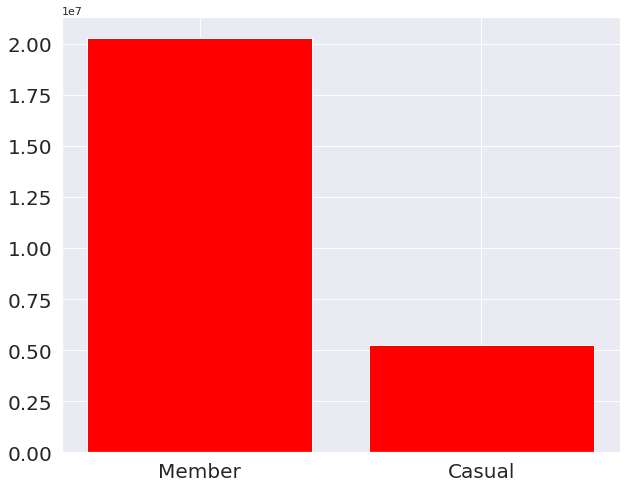

In [24]:
fig = plt.figure(figsize=(10, 8))
index = ['Member', 'Casual']
counts = [20292497,5245528]
plt.bar(index,counts, color = 'red')
plt.yticks(size = 20)
plt.xticks(index, size = 20)
plt.show()
fig.savefig("CapitalMemberTypeOverview.png", bbox_inches='tight')

In [31]:
capital=capital.withColumn("minutes", capital.Duration/60)
'minutes'in list(capital.columns)

True

In [47]:
capital.select("minutes").summary('mean').show()

+-------+------------------+
|summary|           minutes|
+-------+------------------+
|   mean|18.334368543016367|
+-------+------------------+



In [32]:
capitaltest1 = capital.groupby('member_type')
capitaltest1

In [33]:
avg_cols1 = ['minutes']
capitaltest1.avg(*avg_cols1).show()

+-----------+------------------+
|member_type|      avg(minutes)|
+-----------+------------------+
|    Unknown|12.939814814814813|
|     Member|12.656261356106139|
|     Casual| 40.30036784031397|
+-----------+------------------+



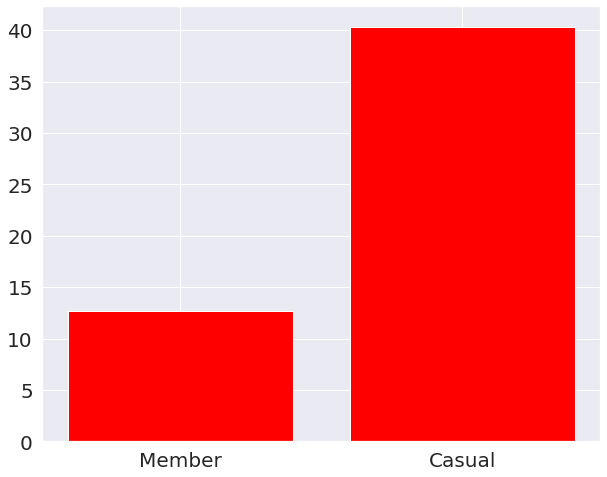

In [34]:
fig = plt.figure(figsize=(10, 8))
index = ['Member', 'Casual']
counts = [12.656,40.300]
plt.bar(index,counts, color = 'red')
plt.yticks(size = 20)
plt.xticks(index, size = 20)
plt.show()
fig.savefig("CapitalMembertypeMinutes.png", bbox_inches='tight')

In [35]:
capital.select("Duration").summary('mean').show()

+-------+------------------+
|summary|          Duration|
+-------+------------------+
|   mean|1100.0621125809814|
+-------+------------------+



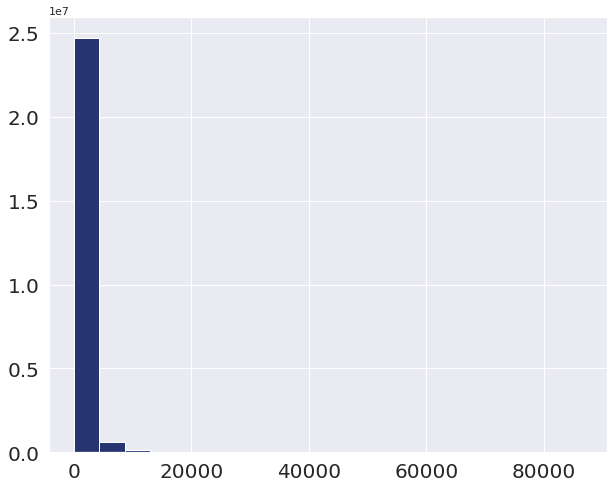

In [41]:
#Histogram of age column
fig = plt.figure(figsize=(10, 8))
bins, counts = capital.select('Duration').rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts, color = '#263572')
plt.xticks(size = 20)
plt.yticks(size = 20)
fig.savefig("NotNeeded2.png", bbox_inches='tight')